# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [2]:
from operator import index

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import false_discovery_control

In [3]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [5]:
df.isnull().sum()


customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

In [6]:
(df.isnull().sum() / len(df)) * 100


customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [7]:
df.dropna(subset=['Genero'], inplace=True)

In [8]:
df['Genero'].isnull().sum()

np.int64(0)

In [9]:
df.dropna(subset=['PhoneService'], inplace=True)

In [10]:
df['PhoneService'].isnull().sum()

np.int64(0)

Exclui as linhas nulas da coluna genero pela baixa quantidade de valores nulos em relação a quantidade de dados.
Já a coluna PhoneService tinha mais da metade dos dados faltantes mesmo assim decidi excluilá já que na minha visão esses dados não tem muita relevancia para o modelo final.

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

Os dados da coluna Pagamento_Mensal não apresentavão outliers segundo o grafico por tanto descidi colocar a media no lugar dos dados faltantes, não exclui esses dados pois acredito que tenham grande relevancia para o modelo final.

In [11]:
df['Pagamento_Mensal'].mean()

np.float64(64.7914534883721)

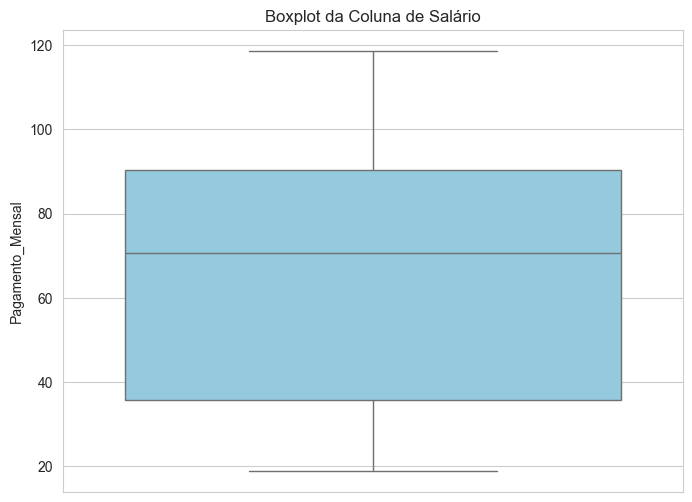

In [12]:
sns.set_style('whitegrid')

# Plota o boxplot da coluna de salário
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Salário')
plt.ylabel('Pagamento_Mensal')
plt.show()

In [13]:

df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].mean())

0       29.850000
1       56.950000
2       53.850000
3       64.791453
16      64.791453
          ...    
2495    20.250000
2496    20.050000
2497    19.600000
2498    53.800000
2499    70.200000
Name: Pagamento_Mensal, Length: 1006, dtype: float64

In [14]:
df['Pagamento_Mensal'].isnull().sum()

np.int64(146)

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

Apesar de serem poucas as linhas nulas descidi completar com os dados que mais apareciam segundo o grafico já que esses dados tem extrema importancia se tratando que essa seria a variavel target.

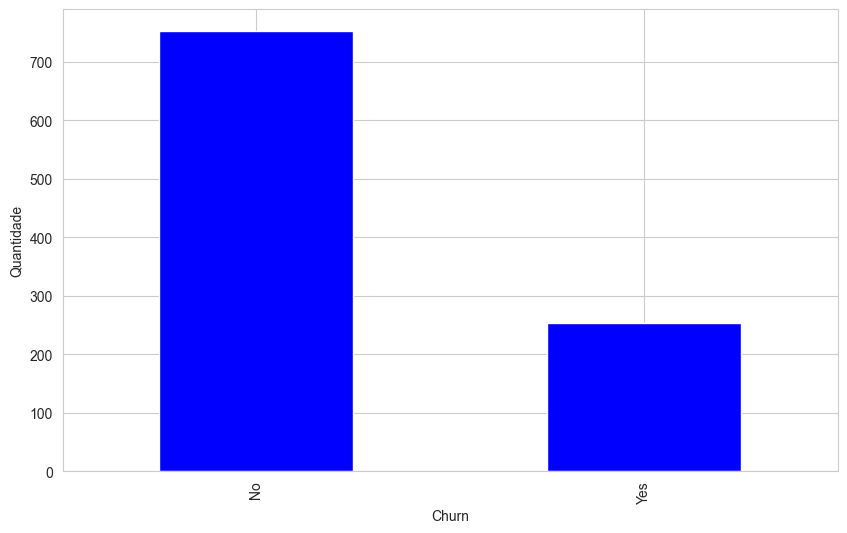

In [15]:
plt.figure(figsize=[10,6])
df['Churn'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.show()

In [16]:
df['Churn'].fillna('No')


0        No
1        No
2       Yes
3        No
16       No
       ... 
2495     No
2496     No
2497     No
2498     No
2499     No
Name: Churn, Length: 1006, dtype: object

In [17]:
df['Churn'].isnull().sum()

np.int64(0)

In [18]:
df.isnull().sum()

customerID              0
Genero                  0
Idoso                   0
Casado                  0
Dependents              0
Tempo_como_Cliente      0
PhoneService            0
Servico_Internet        0
Servico_Seguranca       0
Suporte_Tecnico         0
StreamingTV             0
Tipo_Contrato           0
PaymentMethod           0
Pagamento_Mensal      146
Total_Pago              0
Churn                   0
dtype: int64

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [19]:
df['Tipo_Contrato'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [20]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [21]:
df['Genero'].unique()

array(['Female', 'Male', 'F', 'M', 'f'], dtype=object)

In [22]:
df['Genero'] = df['Genero'].str.upper()

In [23]:
df['Genero'] = df['Genero'].replace('FAMELE', 'FEMALE')

In [24]:
df['Genero'].unique()

array(['FEMALE', 'MALE', 'F', 'M'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [25]:
df.rename(columns={'PhoneService': 'ServicoTelefonico'}, inplace=True)

In [26]:
df.rename(columns={'PaymentMethod': 'MetodoPagamento'}, inplace=True)

In [27]:
df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,ServicoTelefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,MetodoPagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,FEMALE,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,MALE,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,MALE,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,MALE,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
16,8191-XWSZG,F,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,NaN,1022.95,No
17,9959-WOFKT,MALE,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),NaN,7382.25,No
18,4190-MFLUW,F,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),NaN,528.35,Yes
19,4183-MYFRB,F,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,1862.90,No
20,8779-QRDMV,MALE,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,NaN,39.65,Yes
21,1680-VDCWW,MALE,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),NaN,202.25,No


In [29]:
df.to_csv("CHURN_CREDIT_MOD08_PART2.csv", index=False)